# Test Theory

In this notebook, we verify step by step the theory we have derived for the simulations run.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import network_design as nd
from itertools import combinations

In [2]:
np.savetxt?

Signature:      
np.savetxt(
    fname,
    X,
    fmt='%.18e',
    delimiter=' ',
    newline='\n',
    header='',
    footer='',
    comments='# ',
    encoding=None,
)
Call signature:  np.savetxt(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function savetxt at 0x2ab62c926700>
File:            ~/.local/lib/python3.9/site-packages/numpy/lib/_npyio_impl.py
Docstring:      
Save an array to a text file.

Parameters
----------
fname : filename, file handle or pathlib.Path
    If the filename ends in ``.gz``, the file is automatically saved in
    compressed gzip format.  `loadtxt` understands gzipped files
    transparently.
X : 1D or 2D array_like
    Data to be saved to a text file.
fmt : str or sequence of strs, optional
    A single format (%10.5f), a sequence of formats, or a
    multi-format string, e.g. 'Iteration %d -- %10.5f', in which
    case `delimiter` is ignored. For complex `X`, the legal options
    for `fmt` are:

    * a single specifier,

## Theory Overview

We define our parameters of our theory first:

- $N$ - number of nodes
- $L$ - number of links
- $r$ - rate that two nodes will interact
- $p_{ij}(t)$ - probability that node $i$ and $j$ are connected at time $t$
- $h_{ij}(t)$ - number of available connections between nodes $i$ and $j$ at time $t$
- $N_{i_o}$ is the number of nodes of type $i_o$

### We first empirically measure our rate of interaction $r$ if nodes are chosen at random.

In [3]:
# Generate sequence of nodes
nodes = np.arange(0,1000)

In [3]:
pairs_of_nodes = combinations(nodes,2)

In [4]:
idx = np.arange(0,1000*999/2,dtype=int)

In [5]:
count = np.zeros(int(1000*999/2))

In [6]:
for _ in range(1000000):
    count[np.random.choice(idx)] += 1

In [7]:
np.mean(count/ 1000000) == 2/(1000*999)
print(np.mean(count/ 1000000),2/(1000*999))

2.0020020020020027e-06 2.002002002002002e-06


As expected, if the nodes interact at random, then their rate is $r=\frac{1}{\binom{N}{2}}=\frac{2}{N(N-1)}$.

### Node Capacity

Next we check whether our calculations in the changes in node capacity is correct.
Let us first write down the master equations used.
Let $\frac{dh_{ij}}{dt}$ be the change in the number of available spots available to connect node $i$ and node $j$.
Then we have that 
$$\frac{dh_{ij}}{dt}=-\sum_{l\in j_o}h_{il}(t)$$
where $j_o$ is the node type of node $j$.

From the definition of the types of particles, we have that $h_{il}(0)=h_{il}^*$.

Let's use induction to solve this differential equation.

$\begin{align}
h_{ij}(1) - h_{ij}(0) &= -\sum_{l\in j_o}rh_{il}(0)\\
&=-rh_{ij}(0)N_{j_o}\\
h_{ij}(1)&=h_{ij}(0) - rh_{ij}N_{j_o}\\
&=h_{ij}(0)\left(1-rN_{j_o}\right)\\
h_{ij}(2) - h_{ij}(1) &= -\sum_{l\in j_o}rh_{il}(1)\\
h_{ij}(2) - h_{ij}(0)\left(1-rN_{j_o}\right) &= -\sum_{l\in j_o}rh_{ij}(0)\left(1-rN_{j_o}\right)\\
h_{ij}(2)&=h_{ij}(0)\left(1-rN_{j_o}\right)\left(1-rN_{j_o}\right)\\
&=h_{ij}(0)\left(1-rN_{j_o}\right)^2.
\end{align}$

Assume that $h_{ij}(k)=h_{ij}(0)\left(1-rN_{j_o}\right)^k$.
So we have

$\begin{align}
h_{ij}(k+1) - h_{ij}(k)&=-r\sum_{l\in j_o}h_{il}(k)\\
h_{ij}(k+1) - h_{ij}(0)\left(1-rN_{j_o}\right)^k &= -rN_{j_o}h_{ij}(0)\left(1-rN_{j_o}\right)^k\\
h_{ij}(k+1)&=h_{ij}(0)\left(1-rN_{j_o}\right)^{k+1}.
\end{align}$

Thus we have a formula for the expected number of possible connections for each node at time $t$.
We now expand this for $r=\frac{2}{N(N-1)}$.
Thus we have

$\begin{align}
h_{ij}(t)&=h_{ij}(0)\left(1 - \frac{2N_{j_o}}{N(N-1)}\right)^t
\end{align}$

For large $N$, regardless of $N_{j_o}$ we can approximate this with
$\begin{align}
t\log\left(1-\frac{2N_{j_o}}{N^2}\right)&\approx-\frac{2tN_{j_o}}{N^2}
\end{align}$

So we have $h_{ij}(t)=h_{ij}(0)e^{-2tN_{j_o}/N^2}$.

So we should have exponential decay in number of potential available connections between $i$ and $j$.
To test this, we consider a network with 4 different types of nodes each with 20 possible connections.
We do this by randomly creating these nodes and measuring their available spots with time.

In [9]:
capacities = nd.assign_particles(4,20)

In [10]:
X = nd.generate_node_assignments(100,4)

In [23]:
test.node_capacity

{0: {0: 3, 1: 0, 2: 0, 3: 0},
 1: {0: 0, 1: 0, 2: 0, 3: 0},
 2: {0: 0, 1: 2, 2: 1, 3: 3},
 3: {0: 0, 1: 0, 2: 1, 3: 0},
 4: {0: 0, 1: 6, 2: 0, 3: 0},
 5: {0: 0, 1: 0, 2: 3, 3: 6},
 6: {0: 1, 1: 0, 2: 1, 3: 4},
 7: {0: 0, 1: 0, 2: 3, 3: 2},
 8: {0: 0, 1: 6, 2: 3, 3: 0},
 9: {0: 0, 1: 6, 2: 2, 3: 0},
 10: {0: 0, 1: 0, 2: 1, 3: 6},
 11: {0: 0, 1: 0, 2: 0, 3: 5},
 12: {0: 0, 1: 0, 2: 0, 3: 0},
 13: {0: 3, 1: 4, 2: 0, 3: 0},
 14: {0: 0, 1: 5, 2: 3, 3: 0},
 15: {0: 0, 1: 0, 2: 0, 3: 0},
 16: {0: 6, 1: 0, 2: 1, 3: 0},
 17: {0: 0, 1: 0, 2: 2, 3: 0},
 18: {0: 5, 1: 0, 2: 0, 3: 0},
 19: {0: 0, 1: 0, 2: 0, 3: 0},
 20: {0: 6, 1: 0, 2: 0, 3: 0},
 21: {0: 0, 1: 0, 2: 0, 3: 0},
 22: {0: 3, 1: 0, 2: 0, 3: 0},
 23: {0: 0, 1: 1, 2: 0, 3: 0},
 24: {0: 0, 1: 3, 2: 0, 3: 0},
 25: {0: 0, 1: 0, 2: 0, 3: 4},
 26: {0: 0, 1: 0, 2: 0, 3: 3},
 27: {0: 5, 1: 0, 2: 0, 3: 0},
 28: {0: 2, 1: 0, 2: 0, 3: 0},
 29: {0: 0, 1: 0, 2: 3, 3: 1},
 30: {0: 0, 1: 0, 2: 0, 3: 0},
 31: {0: 0, 1: 2, 2: 0, 3: 6},
 32: {0: 0, 1: 7, 

In [11]:
h02 = np.zeros((1000,1000))
for i in range(1000):
    test = nd.NetDesign(X,capacities)
    ret_cap = test.simulate(1000,ret_cap=True)
    h02[:,i] = np.array([np.min([ret_cap[t][0][np.where(test.X[2] == 1)[0][0]],ret_cap[t][2][np.where(test.X[0] == 1)[0][0]]]) for t in range(1000)])
    h02[:,i] = np.array([ret_cap[t][0][np.where(test.X[2] == 1)[0][0]] for t in range(1000)])

In [12]:
r = 2/100**2

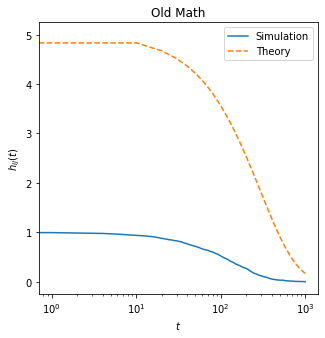

In [28]:
fig = plt.figure(figsize=(5,5))
plt.plot(h02.mean(axis=1),label='Simulation')
plt.semilogx(np.linspace(0,1000,100),5*np.exp(-17*r*np.linspace(0,1000,100)),'--',label='Theory')
plt.xlabel('$t$')
plt.ylabel('$h_{ij}(t)$')
plt.title('Old Math')
plt.legend()
plt.savefig('figs/072224/old_math.pdf')

We see that this lines up relatively well.
Using this value, we can calculate the probability that two nodes are connected after a significant passage of time.
First we identify the probability that two nodes are connected at time $t$.


The probability that $i$ and $j$ are connected at time $t$ is the probability any two pair of edges connect at time $t$.
In the case of random node pairs connecting, this is the same for all time $t$.

In [13]:
capacities

{0: {0: 5, 1: 6, 2: 5, 3: 4},
 1: {0: 4, 1: 9, 2: 0, 3: 7},
 2: {0: 1, 1: 2, 2: 11, 3: 6},
 3: {0: 5, 1: 5, 2: 6, 3: 4}}

In [14]:
X.sum(axis=0)

array([17., 29., 28., 26.])

In [15]:
X

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [3]:
pos = 10*np.random.random((100,2))

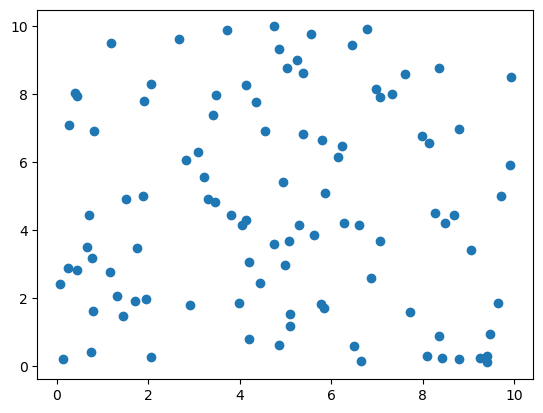

In [4]:
plt.plot(pos[:,0],pos[:,1],'o')

In [64]:
from scipy.spatial.distance import cdist

In [78]:
dist = np.triu(cdist(pos,pos))
idx0, idx1 = np.triu_indices(dist.shape[0],k=1)
np.argsort(dist[np.triu_indices(dist.shape[0],k=1)])

4950

In [77]:
len(idx0)

4950

In [89]:
def rgg_network_design(X,pos,capacities):
    # initialize network
    g = nx.MultiGraph()
    g.add_nodes_from(np.arange(len(X)))
    
    # if time_of_entry is None:
    #     time_of_entry = np.zeros(len(X))
    dist = np.triu(cdist(pos,pos))
    idx0, idx1 = np.triu_indices(dist.shape[0],k=1)
    sorted_idx = np.argsort(dist[np.triu_indices(dist.shape[0],k=1)])
    
    # Add node to network
    for t in range(len(sorted_idx)):
        idx = np.where(sorted_idx==t)[0][0]
        node0, node1 = idx0[idx], idx1[idx]
        # Randomly select two nodes
            
            
        # Get current node label
        label0 = int(np.where(X[node0] == 1)[0])
        label1 = int(np.where(X[node1] ==1)[0])
        
        edge0_capacity = capacities[node0][label1]
        edge1_capacity = capacities[node1][label0]
        
        if edge0_capacity <= 0 or edge1_capacity <= 0:
            continue
        else:
            g.add_edge(node0,node1)
                
            # Update capacities
            capacities[node0][label1] -= 1
            capacities[node1][label0] -= 1

    return g

In [164]:
X = nd.generate_node_assignments(10,5)
capacities = nd.assign_particles(5,10)
cur_cap = nd.create_capacity(X,capacities)
capacities

{0: {0: 2, 1: 2, 2: 2, 3: 3, 4: 1},
 1: {0: 4, 1: 2, 2: 3, 3: 1, 4: 0},
 2: {0: 2, 1: 1, 2: 4, 3: 3, 4: 0},
 3: {0: 2, 1: 2, 2: 3, 3: 1, 4: 2},
 4: {0: 3, 1: 1, 2: 2, 3: 2, 4: 2}}

In [165]:
pos = 10*np.random.random((10,2))

In [166]:
import copy
g = rgg_network_design(X,pos,copy.deepcopy(cur_cap))

/tmp/ipykernel_4872/3098028802.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label0 = int(np.where(X[node0] == 1)[0])
/tmp/ipykernel_4872/3098028802.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label1 = int(np.where(X[node1] ==1)[0])


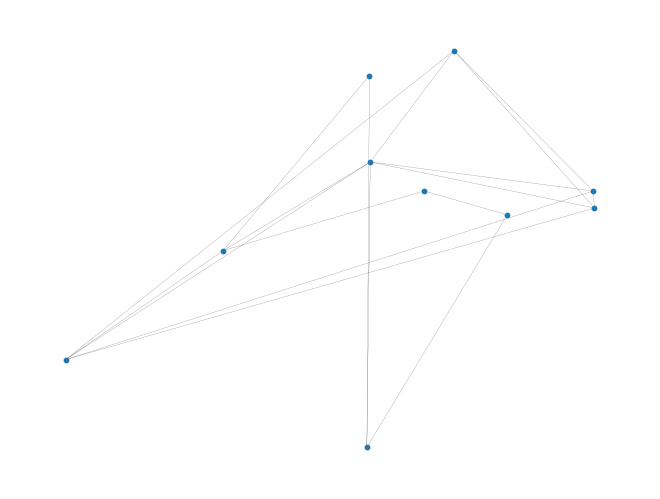

In [167]:
nx.draw(g,pos=pos,node_size=10,width=.1)

In [168]:
new_g = nd.soup_of_nodes(X,cur_cap,T=100000)

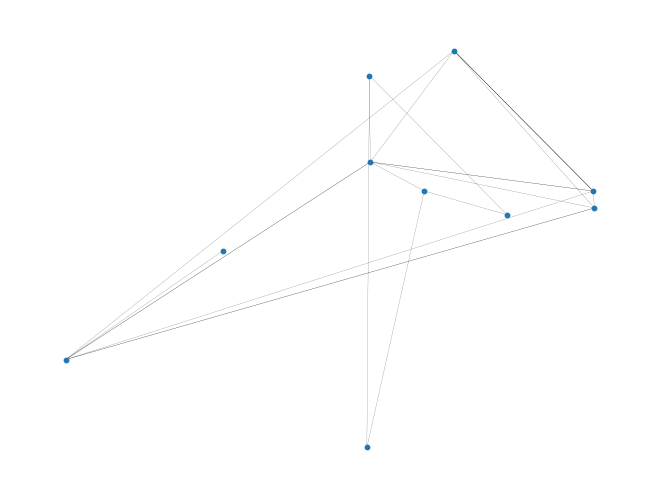

In [169]:
nx.draw(new_g,pos=pos,node_size=10,width=.1)

In [201]:
A_rand = np.load('simulations/test_10/A_rand.txt.npy')

In [202]:
X = np.loadtxt('simulations/test_1/node_labels.txt')

In [203]:
import json
def jsonKeys2int(x):
    if isinstance(x, dict):
        return {int(k):v for k,v in x.items()}
    return x

In [204]:
with open('simulations/test_10/particle_dict.json') as json_file:
    data = json.load(json_file,object_hook=jsonKeys2int)

In [205]:
O = np.zeros((5,5))

In [206]:
for i in range(5):
    for j in range(i,5):
        O[i,j] = np.min([data[i][j],data[j][i]])
        O[j,i] = O[i,j]

In [169]:
data

{0: {0: 0, 1: 1, 2: 3, 3: 5, 4: 1},
 1: {0: 0, 1: 3, 2: 2, 3: 2, 4: 3},
 2: {0: 1, 1: 0, 2: 3, 3: 3, 4: 3},
 3: {0: 1, 1: 1, 2: 2, 3: 4, 4: 2},
 4: {0: 1, 1: 2, 2: 2, 3: 2, 4: 3}}

In [190]:
label0

array([ 2, 11, 19, 24, 25, 35, 38, 39, 45, 57, 59, 65, 66, 68, 72, 79, 82,
       84, 86, 98])

In [191]:
X

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1.

In [171]:
P = np.zeros((A_rand.shape[0],A_rand.shape[1]))
for i in range(A_rand.shape[0]):
    for j in range(i,A_rand.shape[0]):
        u = np.where(X[i]==1)[0][0]
        v = np.where(X[j]==1)[0][0]
        P[i,j] = O[u,v] / np.max([X[:,u].sum(),X[:,v].sum()])
        P[j,i] = P[i,j]

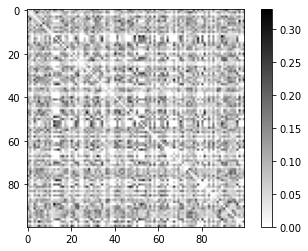

In [149]:
plt.imshow(A_rand.mean(axis=2),cmap='binary')
plt.colorbar()
plt.show()

In [202]:
val = []
for i in label2:
    for j in label4:
        val += [A_rand.mean(axis=2)[i,j]]

In [203]:
np.mean(val)

np.float64(0.125)

In [165]:
np.mean(A_rand.mean(axis=2)[label0,label1])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (20,) (16,) 

In [166]:
label0

array([ 2, 11, 19, 24, 25, 35, 38, 39, 45, 57, 59, 65, 66, 68, 72, 79, 82,
       84, 86, 98])

In [204]:
P[i,j]

np.float64(0.10526315789473684)

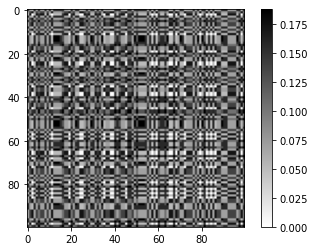

In [144]:
plt.imshow(P,cmap='binary')
plt.colorbar()
plt.show()

In [147]:
label0 = np.where(X[:,0] == 1)[0]
label1 = np.where(X[:,1] == 1)[0]
label2 = np.where(X[:,2] == 1)[0]
label3 = np.where(X[:,3] == 1)[0]
label4 = np.where(X[:,4] == 1)[0]

In [148]:
new_A = np.zeros((A_rand.shape[0],A_rand.shape[1],A_rand.shape[2]))

In [25]:
P = np.zeros((A.shape[0],A.shape[1]))
for i in range(A.shape[0]):
    for j in range(i,A.shape[0]):
        u = np.where(X[i]==1)[0][0]
        v = np.where(X[j]==1)[0][0]
        P[i,j] = O[u,v] / np.max([X[:,u].sum(),X[:,v].sum()])
        P[j,i] = P[i,j]

In [28]:
np.fill_diagonal(P,0)

In [36]:
data

{0: {0: 0, 1: 1, 2: 3, 3: 5, 4: 1},
 1: {0: 0, 1: 3, 2: 2, 3: 2, 4: 3},
 2: {0: 1, 1: 0, 2: 3, 3: 3, 4: 3},
 3: {0: 1, 1: 1, 2: 2, 3: 4, 4: 2},
 4: {0: 1, 1: 2, 2: 2, 3: 2, 4: 3}}

In [40]:
2/N4

0.3333333333333333

In [207]:
N0 = np.random.randint(0,100)
N1 = np.random.randint(0,100)
N2 = np.random.randint(0,100)
N3 = np.random.randint(0,100)
N4 = np.random.randint(0,100)

In [208]:
N = N0 + N1 + N2 + N3 + N4

In [209]:
X = np.zeros((N,5))
N0,N1,N2,N3,N4

(88, 21, 24, 34, 91)

In [210]:
320*319/2

51040.0

In [211]:
X[:N0,0] = 1
X[N0:(N1+N0),1] = 1
X[(N1+N0):(N1+N2+N0),2] = 1
X[(N1+N2+N0):(N0+N1+N2+N3),3] = 1
X[(N0+N1+N2+N3):,4] = 1

In [212]:
# g = nd.soup_of_nodes(X,nd.create_capacity(X,data))
design0 = nd.NetDesign(X,data)
design0.simulate(100000)
A = np.array(nx.adjacency_matrix(design0.g).todense())

In [213]:
data

{0: {0: 0, 1: 4, 2: 1, 3: 3, 4: 2},
 1: {0: 3, 1: 1, 2: 3, 3: 1, 4: 2},
 2: {0: 1, 1: 4, 2: 3, 3: 2, 4: 0},
 3: {0: 1, 1: 2, 2: 6, 3: 1, 4: 0},
 4: {0: 3, 1: 4, 2: 1, 3: 0, 4: 2}}

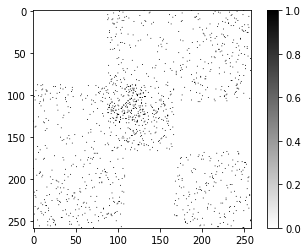

In [214]:
plt.imshow(A,cmap='binary',vmin=0,vmax=1)
plt.colorbar()

In [215]:
est_P = np.zeros(A.shape)

In [216]:
nodes = np.arange(N)
parts = [N0,N1,N2,N3,N4]
for part_1 in range(len(parts)):
    for part_2 in range(len(parts)):
        idx0 = np.sum(parts[:part_1],dtype=int)
        idx1 = np.sum(parts[:part_1+1],dtype=int)
        idx2 = np.sum(parts[:part_2],dtype=int)
        idx3 = np.sum(parts[:part_2+1],dtype=int)
        est_P[idx0:idx1,idx2:idx3] = np.mean(A[idx0:idx1,idx2:idx3])


In [217]:
np.unique(est_P)

array([0.        , 0.01136364, 0.02197802, 0.02941176, 0.03409091,
       0.04535147, 0.05882353, 0.125     ])

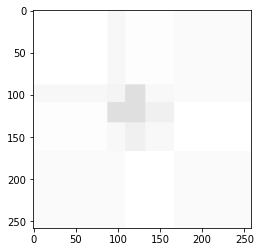

In [218]:
plt.imshow(est_P,cmap='binary',vmin=0,vmax=1)

In [219]:
P = np.zeros((A.shape[0],A.shape[1]))
for i in range(A.shape[0]):
    for j in range(i,A.shape[0]):
        u = np.where(X[i]==1)[0][0]
        v = np.where(X[j]==1)[0][0]
        P[i,j] = O[u,v] / np.max([X[:,u].sum(),X[:,v].sum()])
        P[j,i] = P[i,j]
        


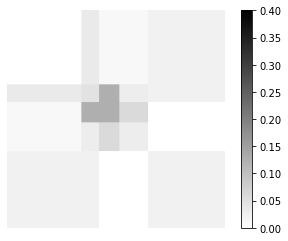

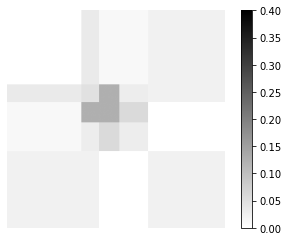

In [223]:
# fig, ax = plt.subplots(1,2)
# axs = ax.ravel()
plt.imshow(est_P,cmap='binary',vmin=0,vmax=.4)
plt.colorbar()
plt.axis('off')
plt.savefig('figs/drafts/v1/simulation_ex_1_est_P.pdf')
plt.show()
plt.imshow(P,cmap='binary',vmin=0,vmax=.4)
plt.axis('off')
plt.savefig('figs/drafts/v1/simulation_ex_1_P.pdf')
plt.colorbar()

In [224]:
nodes = np.arange(N)
parts = [N0,N1,N2,N3,N4]
null_model=np.zeros(A.shape)
for part_1 in range(len(parts)):
    for part_2 in range(len(parts)):
        idx0 = np.sum(parts[:part_1],dtype=int)
        idx1 = np.sum(parts[:part_1+1],dtype=int)
        idx2 = np.sum(parts[:part_2],dtype=int)
        idx3 = np.sum(parts[:part_2+1],dtype=int)
        null_model[idx0:idx1,idx2:idx3] = np.random.random()
np.linalg.norm(P-est_P) / np.linalg.norm(P-null_model), np.linalg.norm(P-null_model) 

(np.float64(0.00028482023677579057), np.float64(167.18983228896448))

In [226]:
def colors(X):
    color_dict = []
    for i in range(len(X)):
        if np.where(X[i] == 1)[0][0] == 0:
            color_dict.append('r')
        elif np.where(X[i] == 1)[0][0] == 1:
            color_dict.append('deepskyblue')
        elif np.where(X[i] ==1)[0][0] == 2:
            color_dict.append('gold')
        elif np.where(X[i] == 1)[0][0] == 3:
            color_dict.append('limegreen')
        else:
            color_dict.append('fuchsia')
    return color_dict

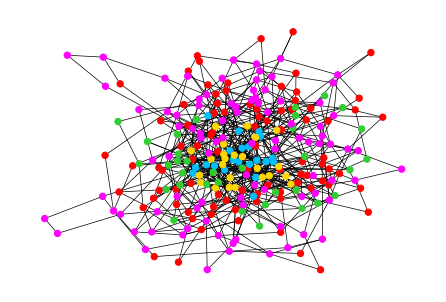

In [232]:
nx.draw(nx.subgraph(design0.g,sorted(list(nx.connected_components(design0.g)),key=len,reverse=True)[0]),node_size=40,width=.7,node_color=colors(X))

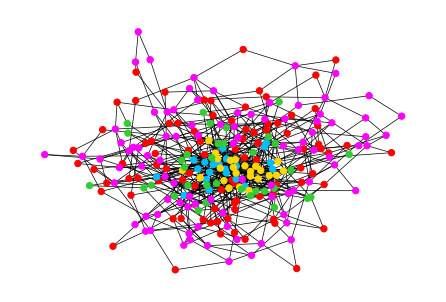

In [235]:
nx.draw(design0.g,node_size=40,width=.7,node_color=colors(X))
plt.savefig('figs/drafts/v1/simulation_ex_1_network.pdf')

In [213]:
data = {0:{0:1,1:10,2:1},
        1:{0:2,1:1,2:0},
        2:{0:2,1:2,2:3}}

In [238]:
O = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        O[i,j] = data[i][j]
        # O[j,i] = O[i,j]

In [236]:
deg = np.array(design0.g.degree())[:,1]
np.mean(deg)

np.float64(4.844961240310077)

In [482]:
def canonical_ensemble(O,N,X):
    A = np.zeros((np.sum(N),np.sum(N)))
    P = np.zeros((np.sum(N),np.sum(N)))
    for i in range(np.sum(N)):
        for j in range(i+1,np.sum(N)):
            r = np.random.random()
            u = np.where(X[i]==1)[0][0]
            v = np.where(X[j] == 1)[0][0]
            P[i,j] = np.min([O[u,v]/N[v],O[v,u]/N[u]])
            if P[i,j] > r:
                A[i,j] = 1
                A[j,i] = 1
    return A, P + P.T

In [331]:
O = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        O[i,j] = int(np.random.normal(5))

In [343]:
N = np.array([100,50,35,16,3])

In [483]:
A, P = canonical_ensemble(O,N,X)

In [334]:
.05*np.sum(N)

np.float64(15.0)

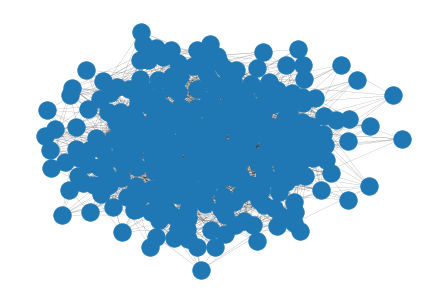

In [335]:
nx.draw(nx.from_numpy_array(A),width=.1)

In [351]:
sum([N[x:].sum() for x in range(1,len(N))]), np.mean(N)

(np.int64(180), np.float64(40.8))

In [337]:
5/np.sum(N)*(np.sum([N[i]/2*i*(i+1) for i in range(len(N))])+np.sum([N[x:].sum() for x in range(1,len(N))]))

np.float64(18.333333333333332)

In [454]:
X = np.zeros((np.sum(N),5))
for i in range(len(N)):
    X[np.sum(N[:i]):np.sum(N[:(i+1)]),i] = 1

TypeError: slice indices must be integers or None or have an __index__ method

In [466]:
O = np.array([[0,2],[2,1]])

In [491]:
X = np.zeros((100,2))
X[:20,0] = 1
X[20:,1] = 1

In [492]:
N = [20,80]

In [511]:
data = {0:{0:0,1:2},1:{0:2,1:1}}

In [512]:
lcc_design = nd.NetDesign(X,data)

In [514]:
lcc_design.simulate(10000)

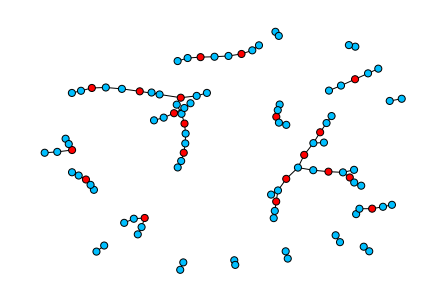

In [516]:
nx.draw(lcc_design.g,width=1,node_color=colors(X),node_size=50,edgecolors='k')
plt.savefig('figs/drafts/v1/lcc_ex_1_master.pdf')

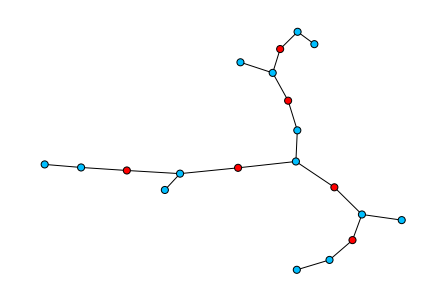

In [517]:
h = nx.subgraph(lcc_design.g,sorted(list(nx.connected_components(lcc_design.g)),key=len,reverse=True)[0])
nx.draw(h,width=1,node_color=colors(X[h.nodes()]),node_size=50,edgecolors='k')
plt.savefig('figs/drafts/v1/lcc_ex_1_comp_master.pdf')

In [505]:
A, P = canonical_ensemble(O,N,X)

In [506]:
g = nx.from_numpy_array(A)


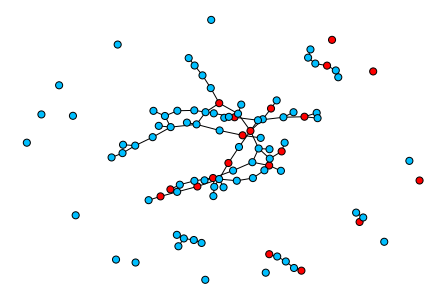

In [507]:
nx.draw(g,width=1,node_color=colors(X),node_size=50,edgecolors='k')
plt.savefig('figs/drafts/v1/lcc_ex_1.pdf')

In [508]:
np.mean(A.sum(axis=1))

np.float64(1.7)

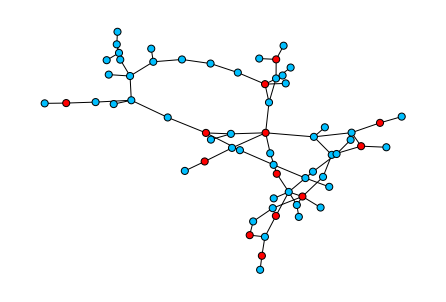

In [509]:
h = nx.subgraph(g,sorted(list(nx.connected_components(g)),key=len,reverse=True)[0])
nx.draw(h,width=1,node_color=colors(X[h.nodes()]),node_size=50,edgecolors='k')
plt.savefig('figs/drafts/v1/lcc_ex_1_comp.pdf')

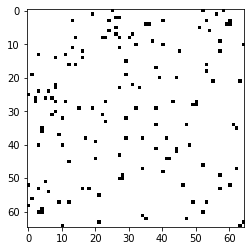

In [510]:
plt.imshow(nx.adjacency_matrix(h).toarray(),cmap='binary')

In [477]:
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [217]:
X2 = np.zeros((100,3))
X2[:5,0] = 1
X2[5:50,1] = 1
X2[50:,2] = 1

In [219]:
# g = nd.soup_of_nodes(X,nd.create_capacity(X,data))
design1 = nd.NetDesign(X2,data)
design1.simulate(100000)
A2 = np.array(nx.adjacency_matrix(design1.g).todense())

In [229]:
est_P2 = np.zeros(A2.shape)

In [244]:
nodes = np.arange(100)
parts = [5,45,50]
for part_1 in range(len(parts)):
    for part_2 in range(len(parts)):
        idx0 = np.sum(parts[:part_1],dtype=int)
        idx1 = np.sum(parts[:part_1+1],dtype=int)
        idx2 = np.sum(parts[:part_2],dtype=int)
        idx3 = np.sum(parts[:part_2+1],dtype=int)
        est_P2[idx0:idx1,idx2:idx3] = np.mean(A2[idx0:idx1,idx2:idx3])

In [247]:
P2 = np.zeros((A2.shape[0],A2.shape[1]))
for i in range(A2.shape[0]):
    for j in range(i,A2.shape[0]):
        u = np.where(X2[i]==1)[0][0]
        v = np.where(X2[j]==1)[0][0]
        P2[i,j] = np.min([O[u,v] / X2[:,v].sum(),O[v,u]/X2[:,u].sum()])
        P2[j,i] = P2[i,j]
        

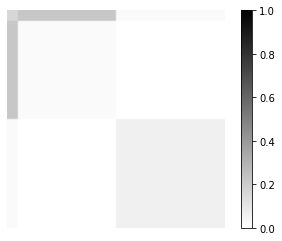

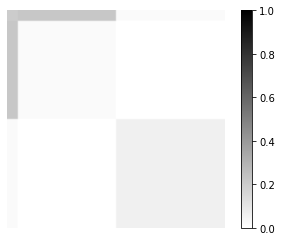

In [248]:
# fig, ax = plt.subplots(1,2)
# axs = ax.ravel()
plt.imshow(est_P2,cmap='binary',vmin=0,vmax=1)
plt.colorbar()
plt.axis('off')
plt.savefig('figs/drafts/v1/simulation_ex_2_est_P.pdf')
plt.show()
plt.imshow(P2,cmap='binary',vmin=0,vmax=1)
plt.axis('off')
plt.savefig('figs/drafts/v1/simulation_ex_2_P.pdf')
plt.colorbar()
plt.show()

In [233]:
P2.shape, est_P2.shape

((100, 100), (100, 100))

In [12]:
A = np.array([[0,0,0,0,0,0,1,0,1,0,1,1],
              [0,0,0,0,0,0,1,0,0,0,1,1],
              [0,0,0,0,0,0,0,0,1,0,1,1],
              [0,0,0,0,0,0,0,1,0,0,1,1],
              [0,0,0,0,0,0,0,0,0,0,1,1],
              [0,0,0,0,0,0,0,0,0,1,1,1],
              [1,1,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,0],
              [1,0,1,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,1,0,0,0,0,0,0],
              [1,1,1,1,1,1,0,0,0,0,0,1],
              [1,1,1,1,1,1,0,0,0,0,1,0]])

In [13]:
P = np.array([[0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [0,0,0,0,0,0,1/3,1/3,1/3,1/3,1,1],
             [1/3,1/3,1/3,1/3,1/3,1/3,1/4,1/4,1/4,1/4,0,0],
             [1/3,1/3,1/3,1/3,1/3,1/3,1/4,1/4,1/4,1/4,0,0],
             [1/3,1/3,1/3,1/3,1/3,1/3,1/4,1/4,1/4,1/4,0,0],
             [1/3,1/3,1/3,1/3,1/3,1/3,1/4,1/4,1/4,1/4,0,0],
             [1,1,1,1,1,1,0,0,0,0,1,1],
             [1,1,1,1,1,1,0,0,0,0,1,1]])

In [14]:
prod = 1
for i in range(A.shape[0]):
    for j in range(i+1,A.shape[0]):
        prod *= P[i,j]**(A[i,j])*(1-P[i,j])**(1-A[i,j])

In [15]:
prod

np.float64(5.5065062223214943e-08)

In [25]:
data = {0:{0:1,1:10},1:{0:12,1:1}}
X = np.zeros((100,2))
X[:70,0] = 1
X[70:,1] = 1
A = np.zeros((100,100,100))
for i in range(100):
    design2 = nd.NetDesign(X,data)
    design2.simulate(10000)
    A[:,:,i] = nx.adjacency_matrix(design2.g).toarray()

In [21]:
10/30, 2/30

(0.3333333333333333, 0.06666666666666667)

In [32]:
10/70

0.14285714285714285

In [31]:
np.mean(A.mean(axis=2)[:70,70:])

np.float64(0.17142857142857143)

In [33]:
fig1_data = {0:{0:0,1:2,2:2},
             1:{0:2,1:1,2:0},
             2:{0:5,1:1,2:2}}

In [34]:
X = np.zeros((12,3))
X[:6,0] = 1
X[6:10,1] = 1
X[10:,2] = 1
X

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [148]:
fig1_design = nd.NetDesign(X,fig1_data)
fig1_design.simulate(1000000)

In [149]:
def colors(X):
    color_dict = []
    for i in range(len(X)):
        if np.where(X[i] == 1)[0][0] == 0:
            color_dict.append('r')
        elif np.where(X[i] == 1)[0][0] == 1:
            color_dict.append('deepskyblue')
        else:
            color_dict.append('gold')
    return color_dict

def shape(X):
    shape_dict = []
    for i in range(len(X)):
        if np.where(X[i] == 1)[0][0] == 0:
            shape_dict.append('^')
        elif np.where(X[i] == 1)[0][0] == 1:
            shape_dict.append('o')
        else:
            shape_dict.append('s')
    return shape_dict


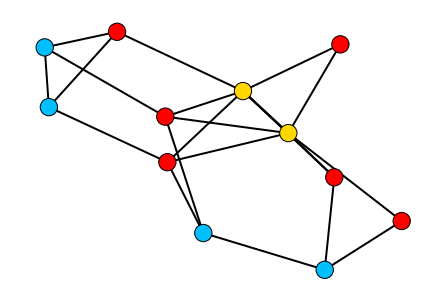

In [155]:
nx.draw(fig1_design.g,node_color=colors(X),width=2,edgecolors='k',alpha=1,linewidths=1)
plt.savefig('figs/drafts/v1/fig1_master_eq_network.pdf')

In [157]:
A = nx.adjacency_matrix(fig1_design.g).toarray()

In [158]:
fig1_est_P = np.zeros((12,12))
N1 = 6
N2 = 4
N3 = 2
parts = [N1,N2,N3]

In [159]:
for part_1 in range(len(parts)):
    for part_2 in range(len(parts)):
        idx0 = np.sum(parts[:part_1],dtype=int)
        idx1 = np.sum(parts[:part_1+1],dtype=int)
        idx2 = np.sum(parts[:part_2],dtype=int)
        idx3 = np.sum(parts[:part_2+1],dtype=int)
        fig1_est_P[idx0:idx1,idx2:idx3] = np.mean(A[idx0:idx1,idx2:idx3])

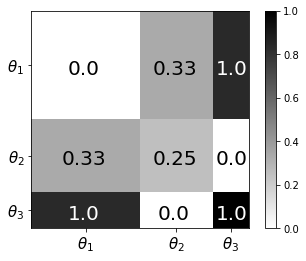

In [174]:
plt.imshow(fig1_est_P,cmap='binary',vmin=0,vmax=1)
plt.xticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.yticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.text(1.5,3,f'{round(P[0,0],2)}',fontsize=20)
plt.text(1.2,8,f'{round(P[8,0],2)}',fontsize=20)
plt.text(1.5,11,f'{round(P[-1,0],2)}',fontsize=20,color='w')
plt.text(6.2,3,f'{round(P[0,8],2)}',fontsize=20)
plt.text(6.2,8,f'{round(P[8,8],2)}',fontsize=20)
plt.text(6.5,11,f'{round(P[-1,8],2)}',fontsize=20)
plt.text(9.7,3,f'{round(P[0,-1],2)}',fontsize=20,color='w')
plt.text(9.7,8,f'{round(P[8,-1],2)}',fontsize=20)
plt.text(9.7,11,f'{round(P[-1,-1],2)}',fontsize=20,color='w')
plt.colorbar()
plt.savefig('figs/drafts/v1/fig1_est_P.pdf')
plt.show()

In [ ]:
fig1_P = np.zeros((12,12))


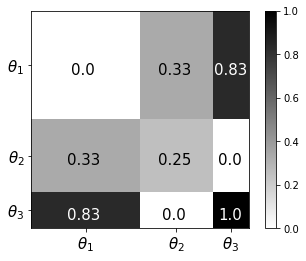

In [188]:
plt.imshow(fig1_est_P,cmap='binary',vmin=0,vmax=1)
plt.xticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.yticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.text(1.7,3,f'{round(fig1_est_P[0,0],2)}',fontsize=15)
plt.text(1.5,8,f'{round(fig1_est_P[8,0],2)}',fontsize=15)
plt.text(1.5,11,f'{round(fig1_est_P[-1,0],2)}',fontsize=15,color='w')
plt.text(6.5,3,f'{round(fig1_est_P[0,8],2)}',fontsize=15)
plt.text(6.5,8,f'{round(fig1_est_P[8,8],2)}',fontsize=15)
plt.text(6.7,11,f'{round(fig1_est_P[-1,8],2)}',fontsize=15)
plt.text(9.6,3,f'{round(fig1_est_P[0,-1],2)}',fontsize=15,color='w')
plt.text(9.8,8,f'{round(fig1_est_P[8,-1],2)}',fontsize=15)
plt.text(9.8,11,f'{round(fig1_est_P[-1,-1],2)}',fontsize=15,color='w')
plt.colorbar()
plt.savefig('figs/drafts/v1/fig1_est_P.pdf')
plt.show()

In [196]:
fig1_P = np.zeros((A.shape[0],A.shape[1]))
for i in range(A.shape[0]):
    for j in range(i,A.shape[0]):
        u = np.where(X[i]==1)[0][0]
        v = np.where(X[j]==1)[0][0]
        fig1_P[i,j] = np.min([O[u,v]/X[:,v].sum(),O[v,u]/X[:,u].sum()])
        fig1_P[j,i] = fig1_P[i,j]

In [197]:
O = np.array([[0,2,2],[2,1,0],[5,1,2]])

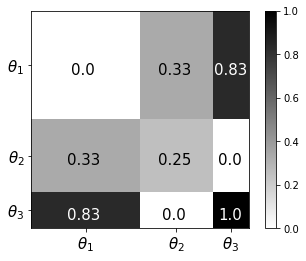

In [200]:
plt.imshow(fig1_P,cmap='binary',vmin=0,vmax=1)
plt.xticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.yticks([2.5,7.5,10.5],[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'],fontsize=15)
plt.text(1.7,3,f'{round(fig1_P[0,0],2)}',fontsize=15)
plt.text(1.5,8,f'{round(fig1_P[8,0],2)}',fontsize=15)
plt.text(1.5,11,f'{round(fig1_P[-1,0],2)}',fontsize=15,color='w')
plt.text(6.5,3,f'{round(fig1_P[0,8],2)}',fontsize=15)
plt.text(6.5,8,f'{round(fig1_P[8,8],2)}',fontsize=15)
plt.text(6.7,11,f'{round(fig1_P[-1,8],2)}',fontsize=15)
plt.text(9.6,3,f'{round(fig1_P[0,-1],2)}',fontsize=15,color='w')
plt.text(9.8,8,f'{round(fig1_P[8,-1],2)}',fontsize=15)
plt.text(9.8,11,f'{round(fig1_P[-1,-1],2)}',fontsize=15,color='w')
plt.colorbar()
plt.savefig('figs/drafts/v1/fig1_P.pdf')
plt.show()

In [2]:
X = nd.generate_node_assignments(10,3)

In [4]:
disconnected_pairs = 10*9/2

In [5]:
disconnected_pairs

45.0

In [7]:
N = X.sum(axis=0)

In [19]:
np.array([N[i]*N[j]  if i != j else N[i]*(N[i]-1) for i in range(3) for j in range(3)]).sum()/2

np.float64(45.0)